# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|...|...|...|
|...|...|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id').sort_index()

## Data Overview

In [3]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,0
7,44.0,0,0,222.75,19.6,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
8,79.0,0,0,99.23,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,0
9,44.0,0,0,125.44,35.5,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,0
10,34.0,0,0,89.11,28.0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
20,36.0,0,0,89.79,27.3,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,0
22,5.0,0,0,100.81,20.6,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,0
23,68.0,0,0,75.91,21.8,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,0
24,72.0,0,1,113.65,27.4,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,0


Test Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
4,37.0,0,0,82.15,24.3,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
12,56.0,0,0,102.30,54.9,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False
14,67.0,0,0,111.04,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
25,4.0,0,0,71.90,14.1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False
66,58.0,0,1,96.48,24.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
71,7.0,0,0,94.41,16.8,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
72,3.0,0,0,93.74,17.7,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
91,42.0,0,0,98.53,18.5,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,35.0,0,0,85.59,28.0,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False


## Exploratory Data Analysis

In [4]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               

None

In [5]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype(int)

In [6]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int32  
 6   gender_Male                     33550 non-null  int32  
 7   gender_Other                    33550 non-null  int32  
 8   ever_married_No                 33550 non-null  int32  
 9   ever_married_Yes                33550 non-null  int32  
 10  work_type_Govt_job              33550 non-null  int32  
 11  work_type_Never_worked          33550 non-null  int32  
 12  work_type_Private               

None

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,41.815312,0.088137,0.043040,103.587081,28.601216,0.597079,0.402742,0.000179,0.361371,0.638629,0.123875,0.004203,0.574635,0.152787,0.144501,0.499970,0.500030,0.168733,0.375618,0.148048,0.015410
std,22.477423,0.283498,0.202951,42.127396,7.782248,0.490492,0.490457,0.013372,0.480405,0.480405,0.329444,0.064693,0.494406,0.359787,0.351602,0.500007,0.500007,0.374522,0.484289,0.355153,0.123178
min,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,91.320000,27.700000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,111.437500,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
def glucose_level(x):
    if x < 70:
        return 'low'
    elif x <= 140:
        return 'normal'
    elif x <= 200:
        return 'high'
    else:
        return 'very high'
    
def bmi_range(x):
    if x < 18.5:
        return 'underweight'
    elif x < 25:
        return 'normal'
    elif x < 30:
        return 'overweight'
    elif x < 35:
        return 'class 1 obesity'
    elif x < 40:
        return 'class 2 obesity'
    else:
        return 'class 3 obesity'
    
train['avg_glucose_level'] = train['avg_glucose_level'].apply(glucose_level)
train['bmi'] = train['bmi'].apply(bmi_range)

display(train.head(10))

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [8]:
glucose_mapping = {'low': 0,
                   'normal': 1,
                   'high': 2,
                   'very high': 3}

bmi_mapping = {'underweight': 0,
               'normal': 1,
               'overweight': 2,
               'class 1 obesity': 3,
               'class 2 obesity': 4,
               'class 3 obesity': 5}

train['avg_glucose_level_encoded'] = train['avg_glucose_level'].map(glucose_mapping)
train['bmi_encoded'] = train['bmi'].map(bmi_mapping)

print(glucose_mapping, bmi_mapping)

display(train.head(10))

{'low': 0, 'normal': 1, 'high': 2, 'very high': 3} {'underweight': 0, 'normal': 1, 'overweight': 2, 'class 1 obesity': 3, 'class 2 obesity': 4, 'class 3 obesity': 5}


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [9]:
test['avg_glucose_level'] = test['avg_glucose_level'].apply(glucose_level)
test['bmi'] = test['bmi'].apply(bmi_range)
test['avg_glucose_level_encoded'] = test['avg_glucose_level'].map(glucose_mapping)
test['bmi_encoded'] = test['bmi'].map(bmi_mapping)

In [10]:
TRAIN = train.drop(['avg_glucose_level','bmi'], axis=1)

In [11]:
scaler = MinMaxScaler()

# Fit and transform the data
train_scaled = scaler.fit_transform(TRAIN.select_dtypes('float64'))

TRAIN[TRAIN.select_dtypes('float64').columns] = train_scaled
display(TRAIN.head(10))

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,
1,0.975586,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,0.536133,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,0.963379,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,0.536133,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,0.414062,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,0.438477,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,0.060059,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,0.829102,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,0.877930,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [12]:
scaler = MinMaxScaler()

# Fit and transform the data
test_scaled = scaler.fit_transform(test.select_dtypes('float64'))

test[test.select_dtypes('float64').columns] = test_scaled

In [13]:
select_cols = ['age','heart_disease','hypertension','avg_glucose_level_encoded','bmi_encoded']


X = TRAIN[select_cols]

y = TRAIN['stroke']

In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


## Modeling

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

### Uitleg over Support Vector Machines (SVM)

Support Vector Machines, oftewel SVM, is een supervised machine learning algoritme dat voornamelijk wordt gebruikt voor classificatie en soms ook voor regressie. Het doel van SVM is om een optimale hypervlak te vinden, ook wel de "decision boundary" genoemd. Deze hypervlak is ontworpen om de afstand tussen verschillende klassen in de dataset te maximaliseren, zodat de nauwkeurigheid van de classificatie wordt verbeterd.SVM kan zowel lineaire als niet-lineaire beslissingsvlakken creëren, afhankelijk  van de data. Wanneer de data lineair scheidbaar is, kan het hypervlak een rechte lijn zijn(besslissinglijn). 



#### Hypervlak Vergelijking:

$$
\text{Hypervlak} = \mathbf{w}^T \mathbf{x} + b = 0
$$

Waarbij:
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.

#### Afstand tussen Datapunt en Hypervlak:

De afstand van een datapunt tot het hypervlak wordt gegeven door:

$$
d(\mathbf{x}) = \frac{|\mathbf{w}^T \mathbf{x}_i + b|}{||\mathbf{w}||}
$$

Waarbij 

-$||\mathbf{w}||$ de Euclidische norm is van de gewichtsvector 
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.



### **Kernel Trick**

Wanneer de data niet lineair gescheiden kan worden vanwege de complexiteit, past SVM een techniek toe die bekend staat als de **"kernel trick"**. Een kernel is een functie die helpt de relatie tussen datapunten te modelleren. Met de kernel trick wordt de data omgevormd naar een hogere dimensie, waardoor de data beter scheidbaar kan worden. De oorspronkelijke kenmerken van de data blijven behouden, terwijl een lineaire scheiding mogelijk wordt in de nieuwe dimensie, zelfs als de oorspronkelijke data niet lineair scheidbaar is.

#### Types van Kernels:

##### 1. Lineaire Kernel:
Gebruikt bij lineaire data, waarbij een rechte lijn de klassen scheidt. De formule hiervoor is:

$$
\mathbf{w}^T \mathbf{x} + b
$$

Waarbij:
- $\mathbf{w}$ de gewichtsvector is,
- $\mathbf{x}$ het datapunt is,
- $b$ de bias-term is.

##### 2. Polynoom Kernel:
Gebruikt voor gegevens die een polynoomvorm vertonen. De formule is:

$$
(\gamma \mathbf{w}^T \mathbf{x} + b)^N
$$

Waarbij:
- $\gamma$: Schaalparameter die de invloed van de inputvector op de output regelt,
- $\mathbf{w}$: Gewichtsvector,
- $\mathbf{x}$: Datapunt,
- $b$: Bias-term,
- $N$: De graad van de polynoom.

##### 3. Radiale Basisfunctie (RBF) Kernel:
Wordt gebruikt bij niet-lineaire data om deze naar een hogere dimensie te brengen en zo de scheiding te verbeteren. De formule is:

$$
e^{-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2}
$$

Waarbij:
- $e$: De basis van de natuurlijke logaritme (ongeveer 2.71828),
- $\gamma$: Hyperparameter die de breedte van de RBF-kernel regelt,
- $||\mathbf{x}_i - \mathbf{x}_j||^2$: De kwadratische afstand tussen de datapunten.

##### 4. Sigmoïde Kernel:
Gebaseerd op de sigmoïde functie, en de formule is:

$$
\tanh(\alpha (\mathbf{x}_i \cdot \mathbf{x}_j) + c)
$$

Waarbij:
- $\tanh$: Hyperbolische tangensfunctie,
- $\alpha$: Schaalparameter die de invloed van het innerlijke product regelt,
- $\mathbf{x}_i \cdot \mathbf{x}_j$: Het inwendige product van de datapunten,
- $c$: Een constante die de output van de functie verschuift.







### **Hinge Loss**

De loss-functie die vaak gebruikt wordt bij SVM is de **hinge loss**. Deze functie geeft aan hoe goed het model classificeert. De formule hiervoor is:

$$
L(y) = \max(0, 1 - t \cdot y)
$$

Waarbij:
- $L(y)$: De waarde van de hinge loss, die aangeeft hoe goed het model het datapunt heeft geclassificeerd,
- $t$: De ware klasse van het datapunt (bijvoorbeeld +1 of -1),
- $y$: De voorspelling van het model.






### **Vormen van Regularisatie in SVM**

Bij Support Vector Machines (SVM) zijn verschillende vormen van regularisatie van toepassing. Regularisatie helpt om overfitting te voorkomen door de complexiteit van het model te beperken. De meest gebruikelijke vormen van regularisatie zijn **L2 regularisatie**, **L1 regularisatie**, en in sommige gevallen **Elastic Net regularisatie**. Hieronder worden deze vormen toegelicht aan de hand van wiskundige formules en hun effecten.

#### L2 Regularisatie (Ridge Regularisatie)

L2 regularisatie voegt een kwadraat van de gewichten ($\mathbf{w}$) toe aan de kostenfunctie. Dit wordt vaak gebruikt bij lineaire SVM's.

##### Kostenfunctie van een SVM met L2 regularisatie:

$$
\text{Minimiseer} \quad \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij:

- $ \mathbf{w} $ de gewichtsvector is die het scheidingsvlak bepaalt.
- $ y_i $ het label is van het $i$-de datapunt ($+1$ of $-1$).
- $ \mathbf{x}_i $ het $i$-de datapunt is.
- $ b $ de bias is.
- $ C $ de regularisatieparameter is die de balans tussen het minimaliseren van de fout en de grootte van de gewichten regelt.

##### Effect van L2 regularisatie:

- **$ \frac{1}{2} ||\mathbf{w}||^2 $**: Dit is de L2 regularisatieterm. Deze term straft grote waarden van de gewichten, waardoor het model minder complex wordt.
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de "hinge loss"-term, die ervoor zorgt dat de punten correct worden geclassificeerd met een marge.

**Effect**: L2 regularisatie zorgt voor een "gladde" oplossing door grote gewichten te bestraffen, wat bijdraagt aan het verminderen van overfitting. Het voorkomt extreem grote waarden voor de gewichten $\mathbf{w}$, maar kan ook onderfitting veroorzaken als $C$ te klein is.

#### L1 Regularisatie (Lasso Regularisatie)

L1 regularisatie voegt de absolute waarden van de gewichten $\mathbf{w}$ toe aan de kostenfunctie. Dit kan leiden tot sparsity, waarbij sommige gewichten precies nul worden.

##### Kostenfunctie van een SVM met L1 regularisatie:

$$
\text{Minimiseer} \quad ||\mathbf{w}||_1 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $ ||\mathbf{w}||_1 $ de som is van de absolute waarden van de elementen van $\mathbf{w}$.

##### Effect van L1 regularisatie:

- **$ ||\mathbf{w}||_1 $**: Dit is de L1 regularisatieterm, die gewichten naar nul dwingt, wat leidt tot een sparsere oplossing (feature selectie).
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de standaard "hinge loss"-term van de SVM.

**Effect**: L1 regularisatie resulteert vaak in enkele gewichten die exact nul zijn, wat nuttig kan zijn voor feature selectie. Het model kan echter minder stabiel zijn, vooral als er sterk gecorreleerde features aanwezig zijn.

####  Elastic Net Regularisatie

Elastic Net regularisatie is een combinatie van L1 en L2 regularisatie. Het combineert de sparsity van L1 en de stabiliteit van L2.

##### Kostenfunctie van een SVM met Elastic Net regularisatie:

$$
\text{Minimiseer} \quad \alpha ||\mathbf{w}||_1 + (1 - \alpha) \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $\alpha$ een parameter is tussen 0 en 1 die de balans tussen L1 en L2 regularisatie regelt.

##### Effect van Elastic Net regularisatie:

- Elastic Net combineert de sparsity van L1 (door sommige gewichten naar nul te dwingen) met de robuustheid van L2 (door extreme gewichten te beperken).
- Het is vooral nuttig wanneer de data multicollineariteit bevat, wat betekent dat sommige features sterk gecorreleerd zijn.



### **Beste hyperparameters**

### **Bron**
https://chatgpt.com/share/6703e161-2d98-8011-adf4-2e7078582002





In [21]:
from sklearn.svm import SVC


# Support Vector Classifier aanmaken
svm = SVC(random_state=42)

# Parameterraster voor de grid search
param_grid = {'C': [10,100,200],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# GridSearch aanmaken en fitten aan de trainingsdata
grid_svm = GridSearchCV(svm, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Beste parameters, estimator en f1-score verkrijgen
svm_best_params = grid_svm.best_params_
svm_best_estimator = grid_svm.best_estimator_
svm_best_f1 = grid_svm.best_score_
svm_pred = svm_best_estimator.predict(X_test)

# Resultaten printen
print("Beste parameters zijn:", svm_best_params)
print("F1-score is:", svm_best_f1)

# Confusion matrix en classification report genereren
cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

# Classification report printen
print(classification_report(y_test, svm_pred))

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

#### Gradient Boosted Decision Trees

best parameters zijn {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 1200}
 f1-score is 0.9599897347884117


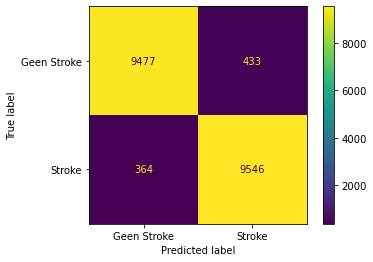

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9910
           1       0.96      0.96      0.96      9910

    accuracy                           0.96     19820
   macro avg       0.96      0.96      0.96     19820
weighted avg       0.96      0.96      0.96     19820



In [95]:
from sklearn.ensemble import GradientBoostingClassifier

#GradientBoostClassifier aanmaken
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [1100,1200,1300],'max_depth': [6,7,8],'min_samples_split': [6,7,8,9,10]}

# gridsearch aanmaken en fitten aan de trainingsdata
grid_gb = GridSearchCV(gb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Beste parameters,estimators en f1 score krijgen
gb_best_params = grid_gb.best_params_
gb_best_estimator = grid_gb.best_estimator_
gb_best_f1 = grid_gb.best_score_
gb_pred = gb_best_estimator.predict(X_test)

# print the results
print("best parameters zijn",gb_best_params)
print(" f1-score is",gb_best_f1)

#confusionmatrix en classifactiion report aanmaken en printen
cm = confusion_matrix(y_test, gb_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke','Stroke'])
cmd.plot()
plt.show()
print(classification_report(y_test, gb_pred))


#### XGBoost

In [80]:
import os  # Import the os module
def submission(gb_1, file_name='GradienBoost'):
    y_pred = gb_1.predict(test[select_cols])
    copy_test = test.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

### Self-assembled ensemble

In [81]:
submission(gb_1, 'GradientBoost')

Submission saved to predictions/GradientBoost.csv


## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 300, max_depth = 2, random_state = 42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f1_score(y_test,y_pred))


0.8859234178160633


In [89]:
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(n_estimators=300, max_depth=2, learning_rate=0.2, random_state=42)
f1_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='f1')
gb_1 = f1_scores.max()
print(gb_1)



0.9305808107819019


## Conclusion & Advice

## Vormen van Regularisatie in SVM

Bij Support Vector Machines (SVM) zijn verschillende vormen van regularisatie van toepassing. Regularisatie helpt om overfitting te voorkomen door de complexiteit van het model te beperken. De meest gebruikelijke vormen van regularisatie zijn **L2 regularisatie**, **L1 regularisatie**, en in sommige gevallen **Elastic Net regularisatie**. Hieronder worden deze vormen toegelicht aan de hand van wiskundige formules en hun effecten.

### 1. L2 Regularisatie (Ridge Regularisatie)

L2 regularisatie voegt een kwadraat van de gewichten ($\mathbf{w}$) toe aan de kostenfunctie. Dit wordt vaak gebruikt bij lineaire SVM's.

#### Kostenfunctie van een SVM met L2 regularisatie:

$$
\text{Minimiseer} \quad \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij:

- $ \mathbf{w} $ de gewichtsvector is die het scheidingsvlak bepaalt.
- $ y_i $ het label is van het $i$-de datapunt ($+1$ of $-1$).
- $ \mathbf{x}_i $ het $i$-de datapunt is.
- $ b $ de bias is.
- $ C $ de regularisatieparameter is die de balans tussen het minimaliseren van de fout en de grootte van de gewichten regelt.

#### Effect van L2 regularisatie:

- **$ \frac{1}{2} ||\mathbf{w}||^2 $**: Dit is de L2 regularisatieterm. Deze term straft grote waarden van de gewichten, waardoor het model minder complex wordt.
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de "hinge loss"-term, die ervoor zorgt dat de punten correct worden geclassificeerd met een marge.

**Effect**: L2 regularisatie zorgt voor een "gladde" oplossing door grote gewichten te bestraffen, wat bijdraagt aan het verminderen van overfitting. Het voorkomt extreem grote waarden voor de gewichten $\mathbf{w}$, maar kan ook onderfitting veroorzaken als $C$ te klein is.

### 2. L1 Regularisatie (Lasso Regularisatie)

L1 regularisatie voegt de absolute waarden van de gewichten $\mathbf{w}$ toe aan de kostenfunctie. Dit kan leiden tot sparsity, waarbij sommige gewichten precies nul worden.

#### Kostenfunctie van een SVM met L1 regularisatie:

$$
\text{Minimiseer} \quad ||\mathbf{w}||_1 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $ ||\mathbf{w}||_1 $ de som is van de absolute waarden van de elementen van $\mathbf{w}$.

#### Effect van L1 regularisatie:

- **$ ||\mathbf{w}||_1 $**: Dit is de L1 regularisatieterm, die gewichten naar nul dwingt, wat leidt tot een sparsere oplossing (feature selectie).
- **$ C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b)) $**: Dit is de standaard "hinge loss"-term van de SVM.

**Effect**: L1 regularisatie resulteert vaak in enkele gewichten die exact nul zijn, wat nuttig kan zijn voor feature selectie. Het model kan echter minder stabiel zijn, vooral als er sterk gecorreleerde features aanwezig zijn.

### 3. Elastic Net Regularisatie

Elastic Net regularisatie is een combinatie van L1 en L2 regularisatie. Het combineert de sparsity van L1 en de stabiliteit van L2.

#### Kostenfunctie van een SVM met Elastic Net regularisatie:

$$
\text{Minimiseer} \quad \alpha ||\mathbf{w}||_1 + (1 - \alpha) \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Waarbij $\alpha$ een parameter is tussen 0 en 1 die de balans tussen L1 en L2 regularisatie regelt.

#### Effect van Elastic Net regularisatie:

- Elastic Net combineert de sparsity van L1 (door sommige gewichten naar nul te dwingen) met de robuustheid van L2 (door extreme gewichten te beperken).
- Het is vooral nuttig wanneer de data multicollineariteit bevat, wat betekent dat sommige features sterk gecorreleerd zijn.







## Sources